## 이 파일에는 발표할 내용을 적어주세요
- 전처리 내용은 markdown으로 간단히 적고, 질문이 들어올 경우 01_EDA 파일을 보여주는 방식!
- read_csv부터 시작
- 연구배경, 선행연구, 문제정의, 분석방법, 분석결과, 결론 및 앞으로 보완할 점도 들어가는 발표 자료파일 입니다!
- 여기에는 발표할때 보여줄 수있는 가장 깔끔한 형태의 코드만 올려주세요 ㅠㅠ 코딩하는 과정에서 확인하기 위해 하는 과정이나, 발표하기에 부적합한 내용은 다른 파일 또는 폴더를 만들어서 해주세요!
- 다른사람이 작성한 내용은 되도록 수정하거나 삭제하지 말아주세요! 충돌이 일어나요

## 1. 연구배경
- 우리나라 소상공인은 2016년 기준 전체 사업체 수의 85.3%를 차지하며 국가 경제에서 높은 비중을 차지하고 있다.
- 이에따라 정부와 지자체는 소상공인이 안정적으로 창업활동을 지속할 수 있도록 다양한 지원정책을 펼치고 있으나 개별 소상공인을 대상으로 단순한 지원을 할 뿐 상권 자체에 관한 정책은 논의되지 못하였다(양갑모, 2006)
- 상권정보시스템은 상권의 현황정보 제공에만 중점을 두고있어 상권을 파악하는데 어려움이 있다.
- 소상공인 컨설팅 서비스는 유료로 서비스를 이용해야하고, 영향력의 정도를 정확히 알려주지 않는다는 한계가 있다.
- 따라서 소상공인의 창업 및 경영을 지원하고, 지자체 단체들에게 상권별로 적합한 소상공인 지원정책을 수립하는데 도움이 되고자 연구

## 2.선행연구

## 3. 문제 정의
- 상권의 특성과 업종을 반영하여 연매출 예측하기<br>

`용어, 명칭 정의하는 도형?표? 추가하기`

## 4. 전처리
`데이터 출처, 데이터 정의 테이블 추가하기`
- 2015년~ 2019년 데이터 수집
- null 값 대체
- 매출액과 상관관계가 0.2 이상인 컬럼 선정
- Merge
- 분기별 데이터를 연 데이터로 groupby 실행(인구, 점포수 등 일부 데이터는 1년에 1~2회 수집하기 때문에 연 매출 분석)



## 5. 회귀분석
- 상관관계 분석
    - 매출액과의 상관관계, 다중공선성을 발생할 수 있는 변수 탐색
- 부분 회귀분석
    - 매출액과의 부분회귀분석. 각 변수별 분석 확인. log 여부 판단
- OLS 분석
    - R-square 값 분석, MAE 또는 MAPE로 모델의 적절성 확인
- K-fold를 통해 과최적화 여부 분석
    - 과최적화인 경우 Rasso 등으로 해결 시도

### 5-1 상관관계 분석

In [6]:
df = pd.read_csv('raw_data/df_grouped_rate.csv',encoding='utf-8' )

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


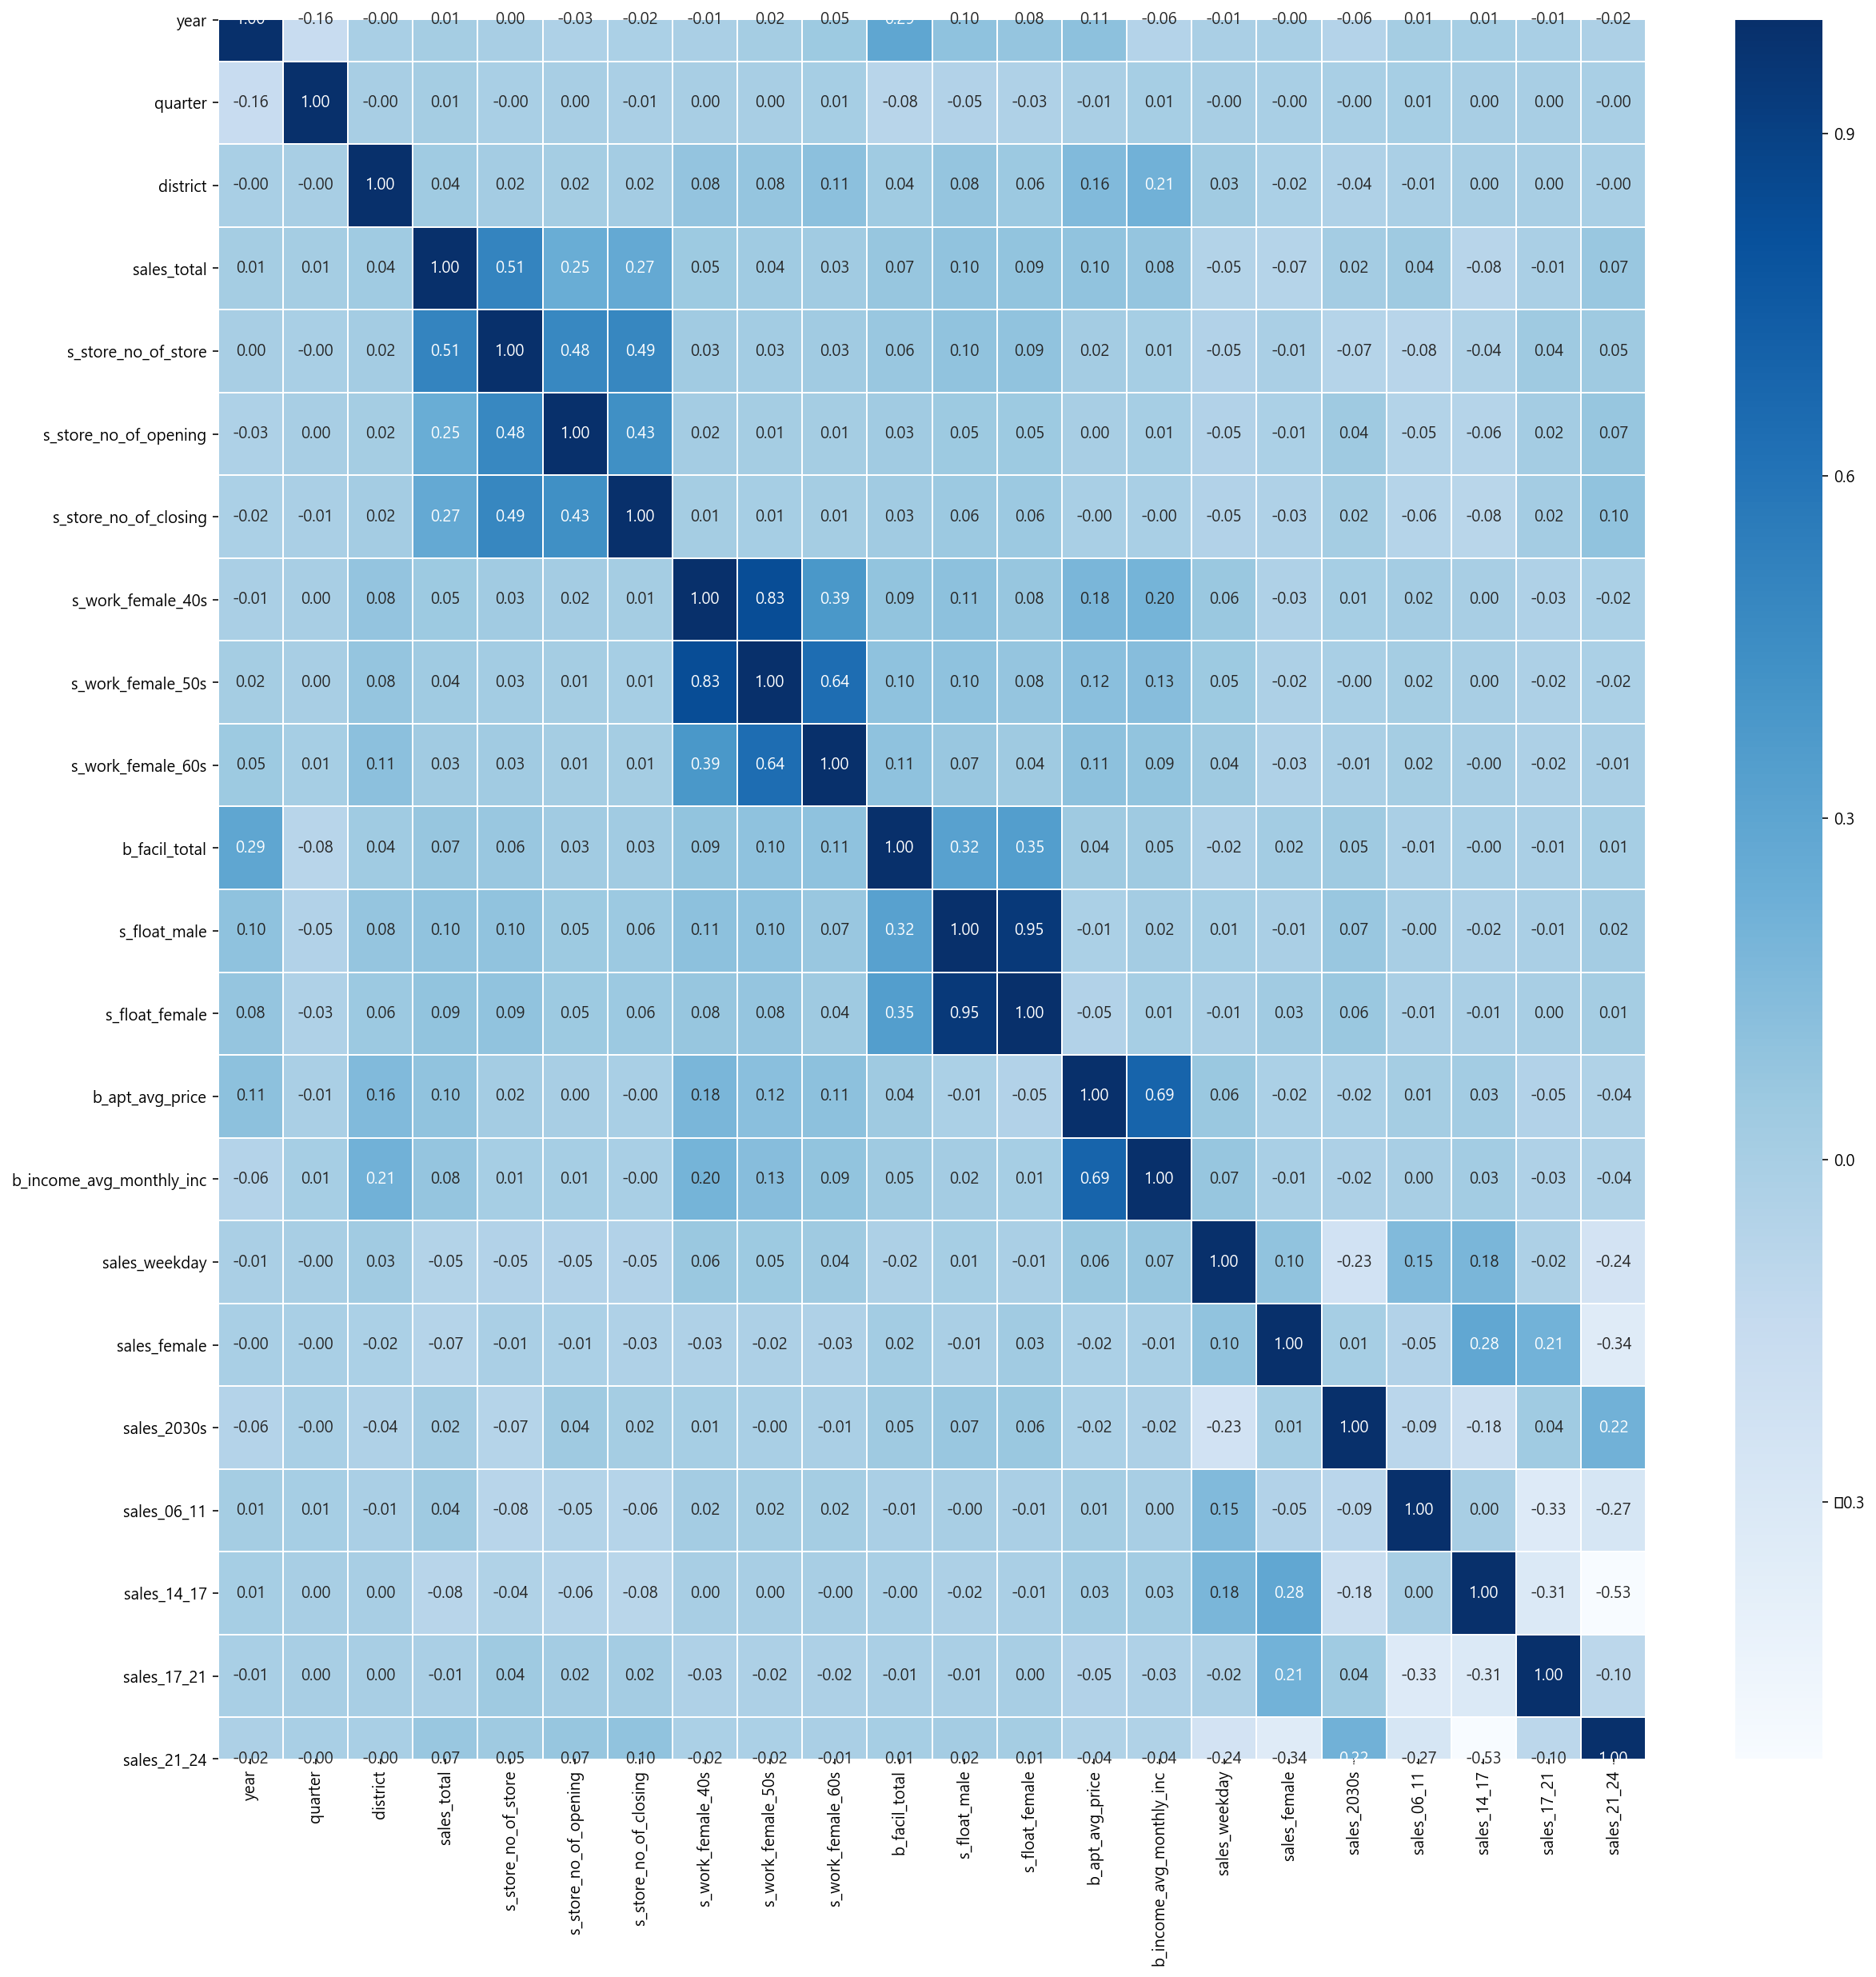

In [36]:
#상관관계 분석
# conda install -c conda-forge matplotlib=3.1.2 또는 3.1.1 깔면 heatmap이 잘리는거 해결할 수 있다고함(시간날때 수정할 예정)
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)


plt.figure(figsize=(20,20))
sns.heatmap(data = df.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

In [10]:
[i for i in df.columns if i not in ['year', 'quarter', 'district', 'code',]]

['sales_total',
 's_store_no_of_store',
 's_store_no_of_opening',
 's_store_no_of_closing',
 's_work_female_40s',
 's_work_female_50s',
 's_work_female_60s',
 'b_facil_total',
 's_float_male',
 's_float_female',
 'b_apt_avg_price',
 'b_income_avg_monthly_inc',
 'sales_weekday',
 'sales_female',
 'sales_2030s',
 'sales_06_11',
 'sales_14_17',
 'sales_17_21',
 'sales_21_24']

In [18]:
df[scale_columns]

,sales_total,s_store_no_of_store,s_store_no_of_opening,s_store_no_of_closing,s_work_female_40s,s_work_female_50s,s_work_female_60s,b_facil_total,s_float_male,s_float_female,b_apt_avg_price,b_income_avg_monthly_inc,sales_weekday,sales_female,sales_2030s,sales_06_11,sales_14_17,sales_17_21,sales_21_24
0,7.443607e+08,16,0,0,84,49,11,129,64732,42810,182553126,3996213,0.713675,0.297634,0.326791,0.009631,0.169620,0.331015,0.116568
1,1.805768e+08,2,0,0,84,49,11,129,64732,42810,182553126,3996213,0.742594,0.328704,0.464586,0.003241,0.160610,0.375991,0.006902
2,4.049651e+07,2,0,0,84,49,11,129,64732,42810,182553126,3996213,0.908512,0.299938,0.472616,0.000000,0.029378,0.246637,0.185894
3,3.583347e+08,5,0,1,84,49,11,129,64732,42810,182553126,3996213,0.657989,0.404086,0.512428,0.001226,0.220166,0.340884,0.061812
4,1.659755e+08,3,1,1,84,49,11,129,64732,42810,182553126,3996213,0.734073,0.458819,0.532406,0.010687,0.280225,0.277228,0.005700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393356,6.495501e+07,2,0,0,45,47,45,93,85717,94483,154040746,2923445,0.941286,0.515377,0.084809,0.076421,0.536813,0.023299,0.000000
393357,1.608440e+09,2,0,0,45,47,45,93,85717,94483,154040746,2923445,0.938462,0.447446,0.112737,0.241197,0.356257,0.118175,0.000000
393358,9.938485e+06,1,0,0,45,47,45,93,85717,94483,154040746,2923445,0.590835,0.166939,0.009820,0.011457,0.237316,0.124386,0.000000
393359,3.582109e+06,3,0,0,45,47,45,93,85717,94483,154040746,2923445,0.632487,0.204174,0.323957,0.136116,0.127042,0.423775,0.000000


In [20]:
#로버스트 스케일링
from sklearn.preprocessing import RobustScaler
scale_columns = [i for i in df.columns if i not in ['year', 'quarter', 'district', 'code',]]

rb = RobustScaler()
rb.fit(df[scale_columns])
df_robust_scaled = rb.transform(df[scale_columns])
df_robust_scaled = pd.DataFrame(df_robust_scaled, columns=scale_columns)
model= sm.OLS.from_formula("sales_total ~ "+" + ".join(scale_columns[1:]), data=df_robust_scaled)
result =  model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            sales_total   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     8781.
Date:                Tue, 24 Dec 2019   Prob (F-statistic):               0.00
Time:                        15:09:50   Log-Likelihood:            -8.1259e+05
No. Observations:              393361   AIC:                         1.625e+06
Df Residuals:                  393342   BIC:                         1.625e+06
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               